In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [69]:
cases = pd.read_csv('united_states_covid19_cases_and_deaths_by_state.csv')
deaths = pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv')
deaths.head()

,Data as of,Start Date,End Date,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,02/17/2021,01/01/2020,02/13/2021,United States,All Sexes,All Ages,460234.0,3658769.0,401250.0,219974.0,8875.0,649194.0,NaN
1,02/17/2021,01/01/2020,02/13/2021,United States,All Sexes,Under 1 year,45.0,19831.0,218.0,7.0,21.0,277.0,NaN
2,02/17/2021,01/01/2020,02/13/2021,United States,All Sexes,0-17 years,197.0,34806.0,592.0,33.0,177.0,933.0,NaN
3,02/17/2021,01/01/2020,02/13/2021,United States,All Sexes,1-4 years,23.0,3593.0,124.0,3.0,60.0,204.0,NaN
4,02/17/2021,01/01/2020,02/13/2021,United States,All Sexes,5-14 years,72.0,5810.0,170.0,13.0,75.0,304.0,NaN


In [180]:
states = deaths.State.unique()
states = np.delete(states, np.where(states == 'United States'))
states = np.delete(states, np.where(states == 'New York City'))
states = np.delete(states, np.where(states == 'District of Columbia'))

df = pd.DataFrame({'State': states})
group_mappings = {
    'Deaths less than 25 years': ['Under 1 year', '1-4 years', '5-14 years', '15-24 years'],
    'Deaths from 25 to 44 years': ['25-34 years', '35-44 years'],
    'Deaths from 45 to 64 years': ['45-54 years', '50-64 years'],
    'Deaths from 65 to 74 years': ['65-74 years'],
    'Deaths 75 years and over': ['75-84 years', '85 years and over']
}
for g in group_mappings:
    df[g] = df['State'].apply(lambda x: deaths[(deaths['State'] == x) 
                                               & (deaths['Age group'].isin(group_mappings[g]))]['COVID-19 Deaths'].sum())
    
df.head()

,State,Deaths less than 25 years,Deaths from 25 to 44 years,Deaths from 45 to 64 years,Deaths from 65 to 74 years,Deaths 75 years and over
0,Alabama,0.0,215.0,1955.0,2185.0,4639.0
1,Alaska,0.0,0.0,40.0,65.0,147.0
2,Arizona,34.0,499.0,3174.0,3040.0,6830.0
3,Arkansas,0.0,94.0,903.0,1113.0,3096.0
4,California,98.0,1674.0,12053.0,10349.0,25229.0


In [181]:
ifr = {
    25: 0.0000972,
    44: 0.00116,
    64: 0.00939,
    74: 0.0487,
    100: 0.142
}
df['Total Deaths'] = df.apply(lambda x: x['Deaths less than 25 years']
                                   + x['Deaths from 25 to 44 years']
                                   + x['Deaths from 45 to 64 years']
                                   + x['Deaths from 65 to 74 years']
                                   + x['Deaths 75 years and over'], axis=1)
df['Reported Deaths'] = df['State'].apply(lambda x: cases[cases['State/Territory'] == x].iloc[0]['Total Deaths'])

df['Calculated Cases'] = df.apply(lambda x: x['Deaths less than 25 years']/ifr[25]
                                   + x['Deaths from 25 to 44 years']/ifr[44]
                                   + x['Deaths from 45 to 64 years']/ifr[64]
                                   + x['Deaths from 65 to 74 years']/ifr[74]
                                   + x['Deaths 75 years and over']/ifr[100]
#                                    - abs(x['Total Deaths'] - x['Reported Deaths'])/.0115
                                  , axis=1)

In [182]:
df['Reported Cases'] = df['State'].apply(lambda x: cases[cases['State/Territory'] == x].iloc[0]['Total Cases'])
df['Cases Difference'] = abs(df['Calculated Cases'] - df['Reported Cases'])/df['Reported Cases']
df['Deaths Difference'] = abs(df['Total Deaths'] - df['Reported Deaths'])/df['Reported Deaths']
# df

In [183]:
tests = pd.read_csv('covid19_tests_performed_by_state.csv')
tests.head()
df['Tests Performed'] = df['State'].apply(lambda x: tests[tests['State'] == x].iloc[0]['Total # Tests'])
df = df[~((df['Cases Difference'] <= 0.4) & (df['Tests Performed'] <= 1.5e7))]
corr, _ = pearsonr(df['Tests Performed'], df['Cases Difference'])
print(corr)

-0.696130178882081


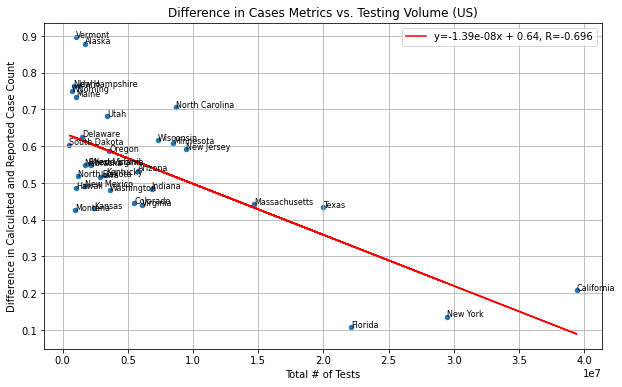

In [184]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
fig, ax = plt.subplots()
df.plot('Tests Performed', 'Cases Difference', kind='scatter', ax=ax, figsize=(10,6))
# df['State'] = df['State'].apply(lambda x: us_state_abbrev[x])
df_by_state = df.set_index('State')
for k, v in df_by_state[['Tests Performed', 'Cases Difference']].iterrows():
    ax.annotate(k, v, size=8)

z = np.polyfit(df['Tests Performed'], df['Cases Difference'], 1)
p = np.poly1d(z)
plt.plot(df['Tests Performed'],p(df['Tests Performed']),"r-", 
         label='y=' + str(round(z[0], 10)) + 'x + ' + str(round(z[1], 2)) + ', R=' + str(round(corr, 3)))
plt.xlabel('Total # of Tests')
plt.ylabel('Difference in Calculated and Reported Case Count')
plt.title('Difference in Cases Metrics vs. Testing Volume (US)')
plt.grid(True)
plt.legend()